In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors = ("#c23f76", "#156697", "#f2cc21", "#9994c2", "#34a198", "#5b5b6d", "#9e1f63", "#a0522d", "#f99533", "#269c62")

In [3]:
df_vivo = pd.read_csv("../analysis/stress_granules/span/hrefseq/G1_kethoxal-K562_M15_B01.txt", sep="\t", index_col=0, names=["iid", "counts", "span", "cpkm"])

df_arsenite = pd.read_csv("../analysis/stress_granules/span/hrefseq/G1_kethoxal-K562-Arsenite-Total_M18_B01.txt", sep="\t", index_col=0, names=["iid", "counts", "span", "cpkm"])

df_HT = pd.read_csv("../analysis/stress_granules/span/hrefseq/G1_kethoxal-K562-siControl+HT-Total_M18_B01.txt", sep="\t", index_col=0, names=["iid", "counts", "span", "cpkm"])

In [4]:
f_refseq = "../data/reference/hg19/gtf/hg19_refseq_ID.txt"

df_iid_to_name = pd.read_csv(f_refseq, sep="\t", names=["iid", "gene"])
df_apex = pd.read_csv("../analysis/stress_granules/APEX.txt", sep="\t", names=["gene", "l2fc"])
df_ps_up = pd.read_csv("../analysis/stress_granules/PS_genes_up.txt", sep="\t", names=["gene"])
df_ps_dw = pd.read_csv("../analysis/stress_granules/PS_genes_down.txt", sep="\t", names=["gene"])

In [5]:
df = pd.merge(df_vivo, df_arsenite, how="inner", on="iid")
df = pd.merge(df, df_HT, how="inner", on="iid")
df.columns = ["counts1", "span1", "cpkm1", "counts2", "span2", "cpkm2", "counts3", "span3", "cpkm3"]
df = pd.merge(df, df_iid_to_name, how="left", on="iid")

In [6]:
df_cond_apex = df[df.gene.isin(df_apex.gene)]
df_cond_notapex = df[~df.gene.isin(df_apex.gene)]

In [7]:
df_cond_ps = df[df.gene.isin(df_ps_up.gene)]
df_cond_notps = df[~df.gene.isin(df_ps_up.gene)]

[None, None, None, None, None, None, None, None, None, None, None, None]

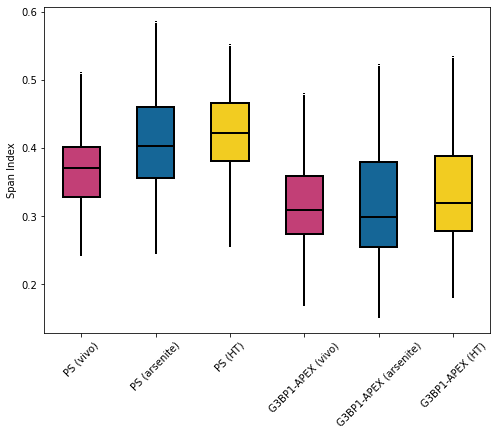

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
bplot = plt.boxplot([df_cond_ps.span1, df_cond_ps.span2, df_cond_ps.span3,
                     df_cond_apex.span1, df_cond_apex.span2, df_cond_apex.span3], 
                    patch_artist=True, sym="")
plt.ylabel("Span Index")
plt.xticks([1,2,3,4,5,6], ["PS (vivo)", "PS (arsenite)", "PS (HT)", 
                           "G3BP1-APEX (vivo)", "G3BP1-APEX (arsenite)", "G3BP1-APEX (HT)"], rotation=45)


# fill with colors
#colors = ['pink', 'lightblue', 'pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors[:3]+colors[:3]):
    patch.set_facecolor(color)

plt.setp(bplot["boxes"], linewidth=2.0)
plt.setp(bplot["medians"], color="black", linewidth=2.0)
plt.setp(bplot["whiskers"], color="black", linewidth=2.0)
plt.setp(bplot["caps"], color="white")

#plt.show()
#plt.savefig("Fig01_BoxPlot_vivo-vs-arsenite_APEX_and_PS.pdf", dpi=300)
#plt.savefig("Fig01_BoxPlot_vivo-vs-arsenite_APEX_and_PS.png", dpi=300)
#plt.savefig("Fig01_BoxPlot_vivo-vs-arsenite_APEX_and_PS.svg", dpi=300)